# Project 4
### DAV 5400 Spring 2019-Week 14
__Maayan Raviv__
<br>
__Dean Pienica__
<br>
<br>
_Predictive Modeling with scikit-learn_
***

This project deals with parcticing predictive analysis and then construct a predictive model using tools available within the scikit-learn library. 
<br>
The data that will be used to demonstrate that is the UCI Mushroom Data Set. In this Project, we’ll use scikit-learn to answer the question:
<br>
__“Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of
whether a particular mushroom is poisonous or edible?”__


## Phase 1- Data Frame
Please Install the packages bellow using the anconda Pprompt and running the cell. 

In [2]:
!pip install graphviz
!pip install python-graphviz
# Run only once and review it the requirement is statidifed.
# use the Anacona Prompt to install python-graphviz

  Could not find a version that satisfies the requirement python-graphviz (from versions: )
No matching distribution found for python-graphviz


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

CSV_file_source = "https://raw.githubusercontent.com/maayan3007/DAV-5400/master/agaricus-lepiota.data"
data = pd.read_csv(
    CSV_file_source, 
    index_col=False, 
    header=None, 
    names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
          ])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Creating a new subset from the data frame that includes 3 variables:
* Class
* Odor
* Spore print color
* habitat

In [4]:
dataset = data[['class', 'odor', 'spore-print-color', 'habitat']].copy()
original_dataset = dataset.copy()
dataset.head()

,class,odor,spore-print-color,habitat
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g


Performing Null's values check in the subset

In [5]:
# Check for any null values in the selected subset of columns
dataset.isnull().values.any()

False

Converting the values in the subset into numric values to perform an analysis

In [6]:
# Converting to numeric values
# Class column
class_map = {'p': 1, 'e': 0}
dataset['class'] = dataset['class'].map(class_map)
dataset.head()

,class,odor,spore-print-color,habitat
0,1,p,k,u
1,0,a,n,g
2,0,l,n,m
3,1,p,k,u
4,0,n,n,g


In [7]:
# Converting other columns to numeric values
# odor almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
odor_map = {'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}
dataset['odor'] = dataset['odor'].map(odor_map)

# spore-print-color black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
color_map = {'k':0, 'n':1, 'b':2, 'h':3, 'r':4, 'o':5, 'u':6, 'w':7, 'y':8}
dataset['spore-print-color'] = dataset['spore-print-color'].map(color_map)

# habitat grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
habitat_map = {'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}
dataset['habitat'] = dataset['habitat'].map(habitat_map)

dataset.head()

,class,odor,spore-print-color,habitat
0,1,7,0,4
1,0,0,1,0
2,0,1,1,2
3,1,7,0,4
4,0,6,1,0


##  Exploratory data analysis
we will perform an exploratory data analysis that will review each of the selected variables. 

In [8]:
dataset.astype('int').describe()

,class,odor,spore-print-color,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,4.788282,3.062038,3.221073
std,0.499708,1.983678,2.825308,2.530692
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000
50%,0.000000,6.000000,3.000000,3.000000
75%,1.000000,6.000000,7.000000,6.000000
max,1.000000,8.000000,8.000000,6.000000


### Odoe Variable
Bellow there is a comparison of the Odor variable with each of the attributs of the class variable.
<br>
It's cleary show that most cases where the mushroon is pioson where when the odor was foul. 
<br>
Also, in most cases when the the mushroom was edible the odor was defined as none.
<br>
The Odor attributes are classified as bellow-
* almond=a
* anise=l
* creosote=c
* fishy=y
* foul=f
* musty=m
* none=n
* pungent=p 
* spicy=s 

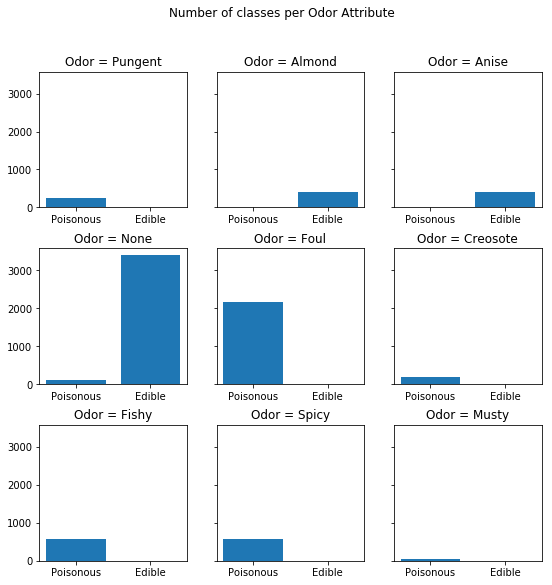

In [9]:
# Attribute Odor  
# almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 

p_counts = dict(original_dataset[original_dataset['class']=='p']['odor'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['odor'].value_counts())

fig, axs = plt.subplots(3, 3, figsize=(9, 9), sharey=True)
fig.subplots_adjust(hspace=.3)
names = ['Poisonous', 'Edible']

p_values = [p_counts.get('p', 0), e_counts.get('p', 0)]
axs[0][0].bar(names, p_values)
axs[0][0].set_title("Odor = Pungent")

a_values = [p_counts.get('a', 0), e_counts.get('a', 0)]
axs[0][1].bar(names, a_values)
axs[0][1].set_title("Odor = Almond")

l_values = [p_counts.get('l', 0), e_counts.get('l', 0)]
axs[0][2].bar(names, l_values)
axs[0][2].set_title("Odor = Anise")

n_values = [p_counts.get('n', 0), e_counts.get('n', 0)]
axs[1][0].bar(names, n_values)
axs[1][0].set_title("Odor = None")

f_values = [p_counts.get('f', 0), e_counts.get('f', 0)]
axs[1][1].bar(names, f_values)
axs[1][1].set_title("Odor = Foul")

c_values = [p_counts.get('c', 0), e_counts.get('c', 0)]
axs[1][2].bar(names, c_values)
axs[1][2].set_title("Odor = Creosote")

y_values = [p_counts.get('y', 0), e_counts.get('y', 0)]
axs[2][0].bar(names, y_values)
axs[2][0].set_title("Odor = Fishy")

s_values = [p_counts.get('s', 0), e_counts.get('s', 0)]
axs[2][1].bar(names, s_values)
axs[2][1].set_title("Odor = Spicy")

m_values = [p_counts.get('m', 0), e_counts.get('m', 0)]
axs[2][2].bar(names, m_values)
axs[2][2].set_title("Odor = Musty")

fig.suptitle('Number of classes per Odor Attribute')
plt.show()

### Spore Print Variable
Bellow there is a comparison of the Spoe Print variable with each of the attributs of the class variable.
<br>
It's cleary show that most cases where the mushroon is pioson where when the spore print was chocolate. 
<br>
Also, in most cases when the the mushroom was edible the spoe print was black and brown.
<br>
The Spore Print attributes are classified as bellow-
* black=k
* brown=n
* buff=b
* chocolate=h
* green=r
* orange=o
* purple=u
* white=w*
* yellow=y 

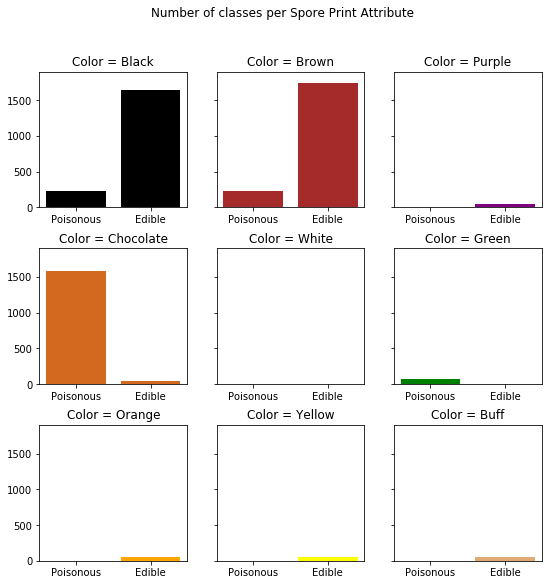

In [22]:
# Attribute spore-print-color
# spore-print-color black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 

p_counts = dict(original_dataset[original_dataset['class']=='p']['spore-print-color'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['spore-print-color'].value_counts())

fig, axs = plt.subplots(3, 3, figsize=(9, 9), sharey=True)
fig.subplots_adjust(hspace=.3)
names = ['Poisonous', 'Edible']

p_values = [p_counts.get('k', 0), e_counts.get('k', 0)]
axs[0][0].bar(names, p_values, color='black')
axs[0][0].set_title("Color = Black")

a_values = [p_counts.get('n', 0), e_counts.get('n', 0)]
axs[0][1].bar(names, a_values, color='brown')
axs[0][1].set_title("Color = Brown")

l_values = [p_counts.get('u', 0), e_counts.get('u', 0)]
axs[0][2].bar(names, l_values, color='purple')
axs[0][2].set_title("Color = Purple")

n_values = [p_counts.get('h', 0), e_counts.get('h', 0)]
axs[1][0].bar(names, n_values, color='chocolate')
axs[1][0].set_title("Color = Chocolate")

f_values = [p_counts.get('w', 0), e_counts.get('w', 0)]
axs[1][1].bar(names, f_values, color='white')
axs[1][1].set_title("Color = White")

c_values = [p_counts.get('r', 0), e_counts.get('r', 0)]
axs[1][2].bar(names, c_values, color='green')
axs[1][2].set_title("Color = Green")

y_values = [p_counts.get('o', 0), e_counts.get('o', 0)]
axs[2][0].bar(names, y_values, color='orange')
axs[2][0].set_title("Color = Orange")

s_values = [p_counts.get('y', 0), e_counts.get('y', 0)]
axs[2][1].bar(names, s_values, color='yellow')
axs[2][1].set_title("Color = Yellow")

m_values = [p_counts.get('b', 0), e_counts.get('b', 0)]
axs[2][2].bar(names, m_values, color='#E0AB76')
axs[2][2].set_title("Color = Buff")

fig.suptitle('Number of classes per Spore Print Attribute')
plt.show()

In [11]:
original_dataset['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

### Habitat Variable
Bellow there is a comparison of the Habitat variable with each of the attributs of the class variable.
<br>
It's cleary show that most cases where the mushroon is pioson where when the habitat was paths. 
<br>
Also, . when the habitat was grass or woods it wad hard to detrimne whetear the mushroom would be poison or not
<br>
The habitat attributes are classified as bellow-
* grasses=g
* leaves=l*
* meadows=m
* paths=p
* urban=u 
* waste=w 
* woods=d

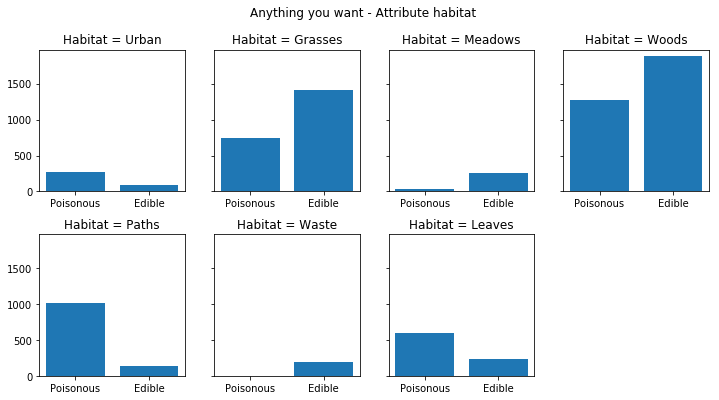

In [12]:
# Attribute habitat
# habitat grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

p_counts = dict(original_dataset[original_dataset['class']=='p']['habitat'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['habitat'].value_counts())

fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharey=True)
fig.delaxes(axs[1][3])
fig.subplots_adjust(hspace=.3)
names = ['Poisonous', 'Edible']

p_values = [p_counts.get('u', 0), e_counts.get('u', 0)]
axs[0][0].bar(names, p_values)
axs[0][0].set_title("Habitat = Urban")

a_values = [p_counts.get('g', 0), e_counts.get('g', 0)]
axs[0][1].bar(names, a_values)
axs[0][1].set_title("Habitat = Grasses")

l_values = [p_counts.get('m', 0), e_counts.get('m', 0)]
axs[0][2].bar(names, l_values)
axs[0][2].set_title("Habitat = Meadows")

n_values = [p_counts.get('d', 0), e_counts.get('d', 0)]
axs[0][3].bar(names, n_values)
axs[0][3].set_title("Habitat = Woods")

f_values = [p_counts.get('p', 0), e_counts.get('p', 0)]
axs[1][0].bar(names, f_values)
axs[1][0].set_title("Habitat = Paths")

c_values = [p_counts.get('w', 0), e_counts.get('w', 0)]
axs[1][1].bar(names, c_values)
axs[1][1].set_title("Habitat = Waste")

y_values = [p_counts.get('l', 0), e_counts.get('l', 0)]
axs[1][2].bar(names, y_values)
axs[1][2].set_title("Habitat = Leaves")


fig.suptitle('Anything you want - Attribute habitat')
plt.show()

### Odoe Variable- bar chart
Bellow there is a bar chart of the odor attribute that shows the distribution of all values among different classes. 
<br>
In most cases the odor wasn't determined and was none and the mushrooms weren't poisned.
<br>
Also, most cases where the mushrooms where poisned the odor was foul.
<br>
The only cases were the mushrrom were non-poisend at all where were the odor was almond or anise. And the only cases where the mushrooms were find only poisoned were where the odor was creosote, fishy, musty, pungent, foul and spicy

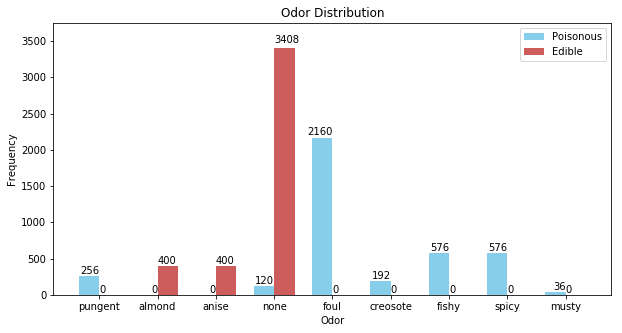

In [23]:
# Attribute Odor       
p_counts = dict(original_dataset[original_dataset['class']=='p']['odor'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['odor'].value_counts())

for key in original_dataset['odor'].unique():
    if not(key in p_counts.keys()):
        p_counts[key]=0
    if not(key in e_counts.keys()):
        e_counts[key]=0

# sort lists
poisonous_counts = []
edible_counts = []
labels = []
odor_map = {'a': 'almond','l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy' }
for key in original_dataset['odor'].unique():
    poisonous_counts.append(p_counts[key])
    edible_counts.append(e_counts[key])
    labels.append(odor_map[key])

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0, 'left': 1}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height, '{}'.format(height), ha=ha[xpos], va='bottom')
           
ind = np.arange(len(poisonous_counts))  # the x locations for the groups
width = 0.35  # the width of the bars

plt.figure(figsize=(10,5))
rects1 = plt.bar(ind - width/2, poisonous_counts, width, color='SkyBlue', label='Poisonous')
rects2 = plt.bar(ind + width/2, edible_counts, width, color='IndianRed', label='Edible')
plt.ylabel('Frequency')
plt.xlabel('Odor')
plt.title('Odor Distribution')
plt.xticks(ind, labels)
plt.margins(y=.1)
plt.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

### Spore Print Variable- bar chart
Bellow there is a bar chart of the spore print attribute that shows the distribution of all values among different classes. 
<br>
In most cases the where the mushrooms were poisned were when the color sprint was whith or chocolate.
Also, most cases where the mushrooms where not poisned were when the color sprint was either black or brown. 
<br>
The only cases were the mushrrom were non-poisend at all where were the color sprint was buff, yellow, ornge and purple. 

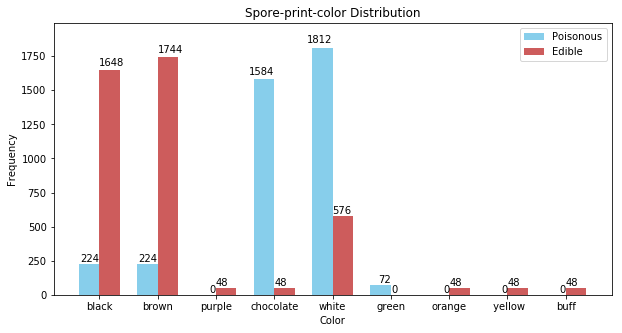

In [25]:
# Attribute spore-print-color
p_counts = dict(original_dataset[original_dataset['class']=='p']['spore-print-color'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['spore-print-color'].value_counts())

for key in original_dataset['spore-print-color'].unique():
    if not(key in p_counts.keys()):
        p_counts[key]=0
    if not(key in e_counts.keys()):
        e_counts[key]=0

# sort lists
poisonous_counts = []
edible_counts = []
labels = []
color_map = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y':' yellow'}
for key in original_dataset['spore-print-color'].unique():
    poisonous_counts.append(p_counts[key])
    edible_counts.append(e_counts[key])
    labels.append(color_map[key])
    
ind = np.arange(len(poisonous_counts))  # the x locations for the groups
width = 0.35  # the width of the bars

plt.figure(figsize=(10,5))
rects1 = plt.bar(ind - width/2, poisonous_counts, width, color='SkyBlue', label='Poisonous')
rects2 = plt.bar(ind + width/2, edible_counts, width, color='IndianRed', label='Edible')
plt.ylabel('Frequency')
plt.xlabel('Color')
plt.title('Spore-print color Distribution')
plt.xticks(ind, labels)
plt.margins(y=.1)
plt.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

### Habitat Variable- bar chart
Bellow there is a bar chart of the Habitat attribute that shows the distribution of all values among different classes. 
<br>
In most cases the where the mushrooms were poisned were when the habitat was woods or paths.
Also, most cases where the mushrooms where not poisned were when the habitat was woods or grasses. 
<br>
There were no cases where the mushrooms were only non poisned. 

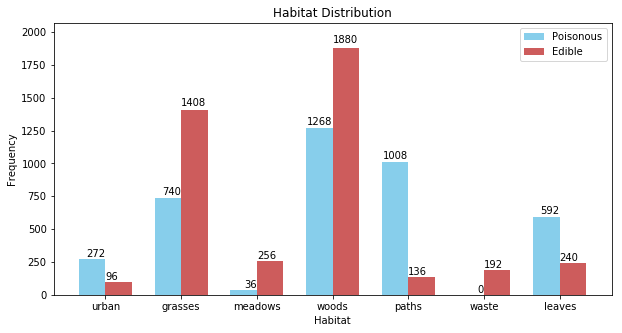

In [26]:
# Attribute habitat
p_counts = dict(original_dataset[original_dataset['class']=='p']['habitat'].value_counts())
e_counts = dict(original_dataset[original_dataset['class']=='e']['habitat'].value_counts())

for key in original_dataset['habitat'].unique():
    if not(key in p_counts.keys()):
        p_counts[key]=0
    if not(key in e_counts.keys()):
        e_counts[key]=0

# sort lists
poisonous_counts = []
edible_counts = []
labels = []
habitat_map = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd':'woods'}
for key in original_dataset['habitat'].unique():
    poisonous_counts.append(p_counts[key])
    edible_counts.append(e_counts[key])
    labels.append(habitat_map[key])
    
ind = np.arange(len(poisonous_counts))  # the x locations for the groups
width = 0.35  # the width of the bars

plt.figure(figsize=(10,5))
rects1 = plt.bar(ind - width/2, poisonous_counts, width, color='SkyBlue', label='Poisonous')
rects2 = plt.bar(ind + width/2, edible_counts, width, color='IndianRed', label='Edible')
plt.ylabel('Frequency')
plt.xlabel('Habitat')
plt.title('Habitat Distribution')
plt.xticks(ind, labels)
plt.margins(y=.1)
plt.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

## Part 2- Predictive model
we will use decision tree to predict which of the variables is the most predictive wether the mushroom is poisned or not.
<br>
The training set was defined as 70% of the subset and the rest as the test set. 

In [16]:
# Shuffle dataset
dataset = dataset.sample(frac=1)

# Training set (70%)
training_set_offset = int(len(dataset)*70/100)
print(training_set_offset)

x_train = dataset.loc[:training_set_offset, ['odor', 'spore-print-color', 'habitat']].astype(int)
y_train = dataset['class'].loc[:training_set_offset].astype(int)

# Test set (30%)
x_test = dataset.loc[training_set_offset:, ['odor', 'spore-print-color', 'habitat']].astype(int)
y_test = dataset['class'].loc[training_set_offset:].astype(int)

5686


__Decision Tree__
According to the desicion tree the Accuracy of the test set is 99.391% in predictive terms.

In [17]:
# Let's build decission tree
# Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0) #try max_depth = 1..8, from rough to 
# (very) sensitive model
tree.fit(x_train, y_train)
print("Accuracy, training set: {:.3f}%".format(tree.score(x_train, y_train)*100))
print("Accuracy, test set: {:.3f}%".format(tree.score(x_test, y_test)*100))
# And visualizate how decision tree works
x_train.head()

Accuracy, training set: 100.000%
Accuracy, test set: 99.391%


,odor,spore-print-color,habitat
4059,6,1,6
4585,4,3,3
4099,4,3,6
3965,4,3,0
4455,4,3,0


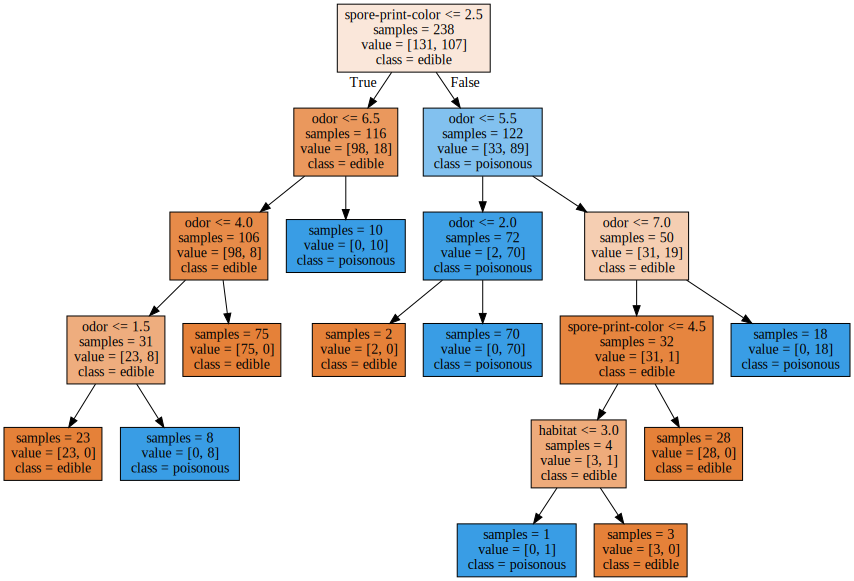

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names = ["edible", "poisonous"],   
                feature_names = ['odor', 'spore-print-color', 'habitat'], impurity=False, 
                filled=True)
import graphviz
with open("./tree.dot", 'r') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

Bellow we reviwed the accuracy of each of the variables as a predicatble variable for the class attribute.
The Odor variable was dtermined as the best predictable. 
For further analysis we will recommend to check the accuracy on a larger set and to approve the conclusion bellow regardless to the other variables in different conditions.
Also we will recommend to review the sprint color which also seem to be a good predictble.
Those results are well detrmined in the explantory analysis that we did before as well. 

In [19]:
# Let's do a quick test to see with feature allows us to predict the nature of mushroom more accurately. 
# To check this, lets create another set of decission trees by selecting one feature at a time. 
# odor
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train[['odor']], y_train)
print("Only odor - Accuracy, training set: {:.3f}%".format(tree.score(x_train[['odor']], y_train)*100))
print("Only odor - Accuracy, test set: {:.3f}%".format(tree.score(x_test[['odor']], y_test)*100))

# spore-print-color
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train[['spore-print-color']], y_train)
print("Only spore-print-color - Accuracy, training set: {:.3f}%".format(tree.score(x_train[['spore-print-color']], y_train)*100))
print("Only spore-print-color - Accuracy, test set: {:.3f}%".format(tree.score(x_test[['spore-print-color']], y_test)*100))

# habitat
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train[['habitat']], y_train)
print("Only habitat - Accuracy, training set: {:.3f}%".format(tree.score(x_train[['habitat']], y_train)*100))
print("Only habitat - Accuracy, test set: {:.3f}%".format(tree.score(x_test[['habitat']], y_test)*100))

Only odor - Accuracy, training set: 99.580%
Only odor - Accuracy, test set: 98.491%
Only spore-print-color - Accuracy, training set: 81.092%
Only spore-print-color - Accuracy, test set: 86.966%
Only habitat - Accuracy, training set: 69.748%
Only habitat - Accuracy, test set: 69.012%
